In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
image_path = "car.jpg"  
img = cv2.imread(image_path)

(-0.5, 1641.5, 1098.5, -0.5)

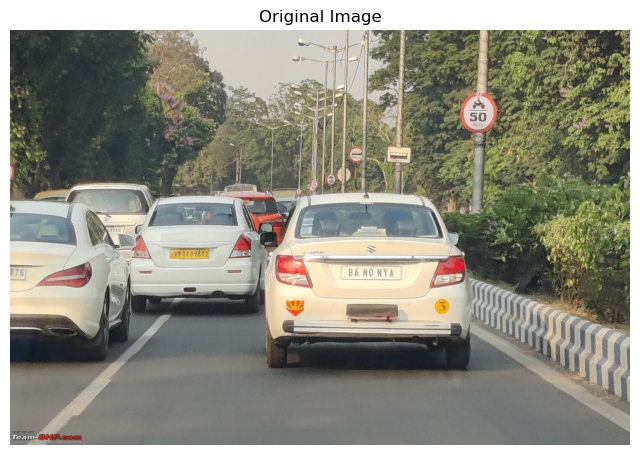

In [3]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")

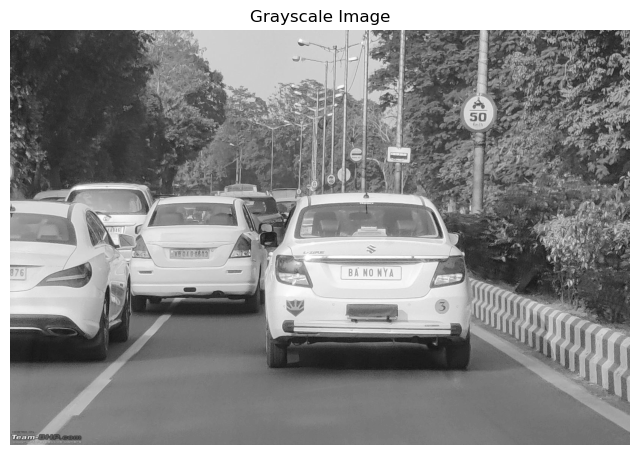

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8,6))
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis("off")
plt.show()


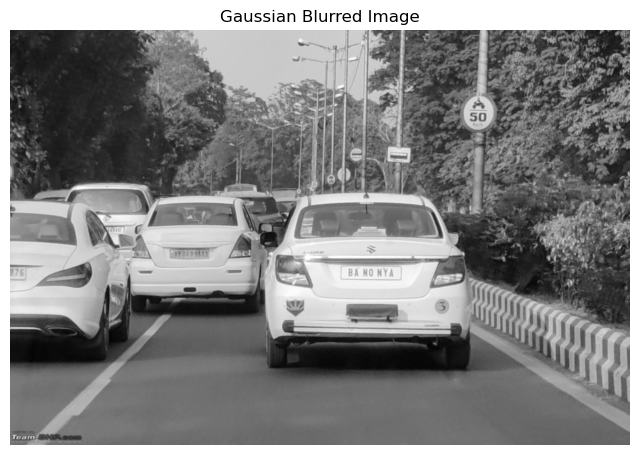

In [8]:
gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)

plt.figure(figsize=(8,6))
plt.title("Gaussian Blurred Image")
plt.imshow(gray_blur, cmap='gray')
plt.axis("off")
plt.show()

In [9]:
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")

In [10]:
plates = cascade.detectMultiScale(
    gray_blur,
    scaleFactor=1.1,     
    minNeighbors=5,     
    minSize=(30, 30)
)

print("Plates detected:", len(plates))

Plates detected: 1


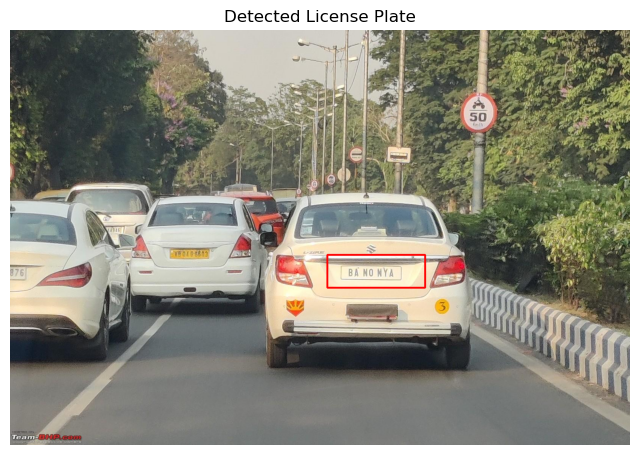

In [11]:
img_detected = img_rgb.copy()

for (x, y, w, h) in plates:
    cv2.rectangle(img_detected, (x, y), (x + w, y + h), (255, 0, 0), 3)

plt.figure(figsize=(8,6))
plt.title("Detected License Plate")
plt.imshow(img_detected)
plt.axis("off")
plt.show()

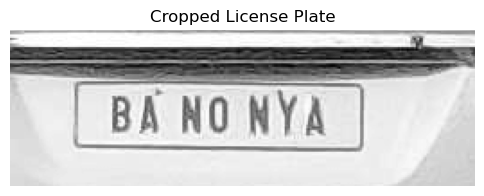

In [ ]:
if len(plates) > 0:
    x, y, w, h = plates[0]    
    plate_roi = gray[y:y+h, x:x+w]

    cv2.imwrite("plate_output.jpg", plate_roi)

    plt.figure(figsize=(6,4))
    plt.title("Cropped License Plate")
    plt.imshow(plate_roi, cmap='gray')
    plt.axis("off")
    plt.show()
else:
    print("No plate detected. Try adjusting parameters.")